# SVM Classifier

In [2]:
import pickle
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

use https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### Load data

In [3]:
#df = pd.read_csv("data/mixed_data.csv", sep=';')
df = pd.read_csv("data/mixed_data_1200.csv", sep=';')
df = df.drop(["Unnamed: 0"],axis=1)
df.head(5)

,target,text
0,0,@Starrbby too bad I won't be around I lost my ...
1,0,amazon s3 plugin not worked in my website . it...
2,0,The Hoyts Distribution NZ website isn't workin...
3,0,dang won't be able to get to any workshops run...
4,0,Tried to install a Twitter-application on my p...


### Split data into train/test set

In [4]:
X_load = df["text"]
Y_load = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X_load,Y_load,test_size=0.2,random_state=42,shuffle=True)

### Vectorize Data

In [5]:
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
X_test_counts = count_vect.transform(X_test.values.astype('U'))
X_train_counts.shape

(2846, 6034)

### TF-IDF Data

In [6]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_train_tfidf.shape

(2846, 6034)

### Train model

In [21]:
svmModel = svm.SVC(gamma='scale', decision_function_shape='ovo')
svmModel.fit(X_train_tfidf, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predict
use the unlabled data

In [22]:
predictions = svmModel.predict(X_test_tfidf)

### Evaluate

In [23]:
svmModel.score(X_test_tfidf,y_test)

0.9339887640449438

In [24]:
print(metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"]))
report = metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"],output_dict=True)
reportdf = pd.DataFrame(report).transpose()
print(reportdf.to_latex())

               precision    recall  f1-score   support

techno-stress       0.97      0.99      0.98       268
      neutral       0.86      0.98      0.92       222
     positive       0.97      0.83      0.89       222

    micro avg       0.93      0.93      0.93       712
    macro avg       0.94      0.93      0.93       712
 weighted avg       0.94      0.93      0.93       712

\begin{tabular}{lrrrr}
\toprule
{} &  f1-score &  precision &    recall &  support \\
\midrule
techno-stress &  0.979592 &   0.974170 &  0.985075 &    268.0 \\
neutral       &  0.917548 &   0.864542 &  0.977477 &    222.0 \\
positive      &  0.893204 &   0.968421 &  0.828829 &    222.0 \\
micro avg     &  0.933989 &   0.933989 &  0.933989 &    712.0 \\
macro avg     &  0.930114 &   0.935711 &  0.930460 &    712.0 \\
weighted avg  &  0.933311 &   0.938196 &  0.933989 &    712.0 \\
\bottomrule
\end{tabular}



#### Learning Curve

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


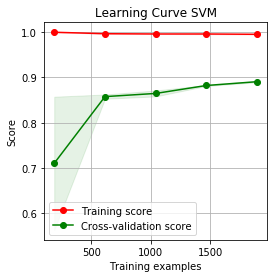

In [25]:
learn1 = skplt.estimators.plot_learning_curve(svmModel, X_train_tfidf, y_train,figsize=(4,4))
plt.title("Learning Curve SVM")
plt.show()

#### Confusion Matrix

<Figure size 432x288 with 0 Axes>

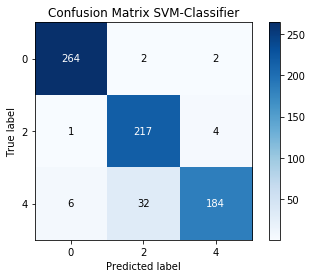

In [26]:
plt.figure()
skplt.metrics.plot_confusion_matrix(y_test,predictions,normalize=False)
plt.title("Confusion Matrix SVM-Classifier")
#cnf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.show()